### belkacem dounia 


### **TP 03 Amélioration du Contraste d'Images par Égalisation d'Histogramme Locale (CLAHE) et Analyse de l'Entropie**



### **Analyse des Résultats**

#### **1. Entropie de l'image originale**

L'entropie de l'image originale est une mesure de la complexité ou de la quantité d'information contenue dans l'image. Une faible entropie indique une image avec peu de variations (par exemple, une image très sombre ou très claire), tandis qu'une entropie élevée indique une image riche en détails.





#### **2. Résultats après égalisation par blocs**

L'égalisation par blocs (CLAHE) permet d'améliorer le contraste localement en divisant l'image en petites régions (ou "tiles") et en appliquant une égalisation d'histogramme sur chaque région. Voici les résultats obtenus pour différentes tailles de blocs :

---

### **Tableau des Résultats**



| **Taille des blocs** | **Entropie avant égalisation** | **Entropie après égalisation** | **Amélioration du contraste** |
|-----------------------|-------------------------------|--------------------------------|--------------------------------|
| `(H/2, W/2)`          | `{4.097907400523076}`          | `{4.169172699942686}`       | Oui                       |
| `(20, 20)`            | `{4.097907400523076}`          | `{5.494233162516137}`       | Oui                       |
| `(40, 40)`            | `{4.097907400523076}`          | `{ 4.8125303213925905}`       | Oui                       |
| `(80, 80)`            | `{4.097907400523076}`          | `{4.331246205212009}`       | Oui                       |




---

### **Améliorations Proposées**

 **Optimisation de la taille des blocs** :
   - Tester des tailles de blocs plus petites ou plus grandes pour trouver un compromis entre amélioration du contraste et préservation des détails.



---

### **Conclusion**

L'égalisation par blocs (CLAHE) est une méthode efficace pour améliorer le contraste des images, en particulier celles avec des variations d'intensité limitées. Cependant, le choix des paramètres (taille des blocs, limite de coupure) est crucial pour obtenir des résultats optimaux.


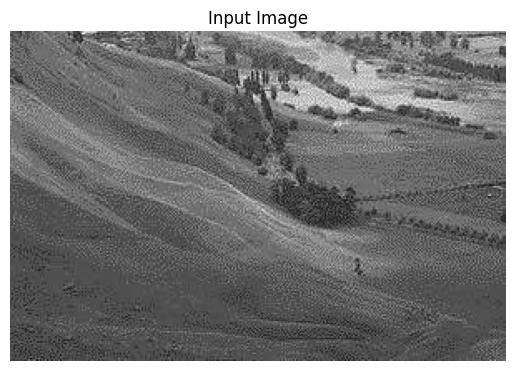

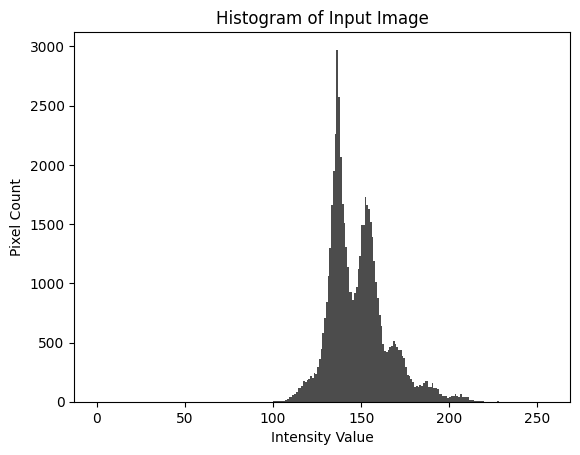

Entropy of original image: 4.097907400523076


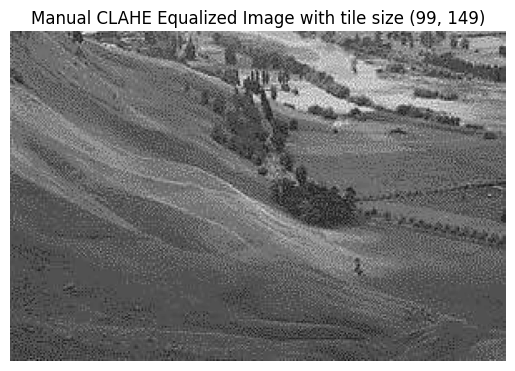

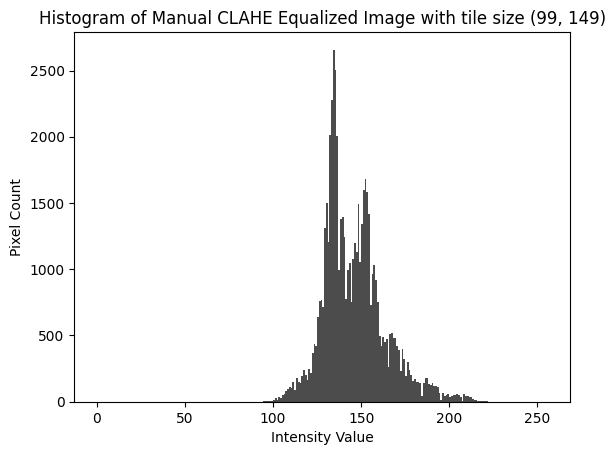

Entropy of manual CLAHE equalized image with tile size (99, 149): 4.169172699942686
The contrast of the image has been enhanced with tile size (99, 149).


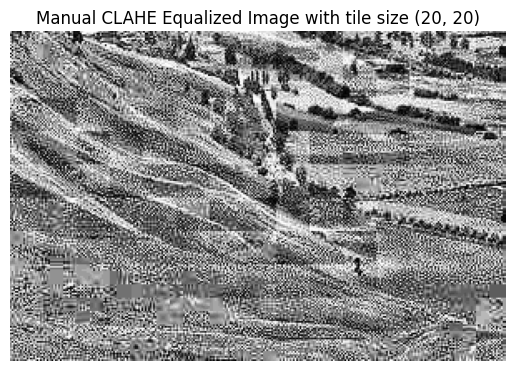

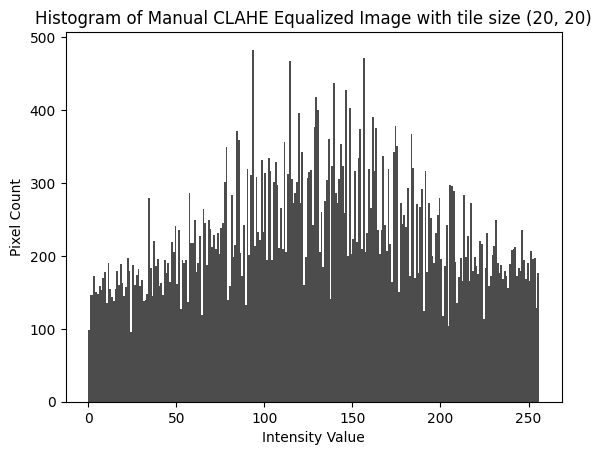

Entropy of manual CLAHE equalized image with tile size (20, 20): 5.494233162516137
The contrast of the image has been enhanced with tile size (20, 20).


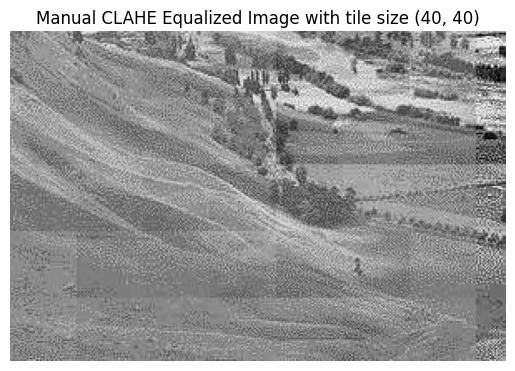

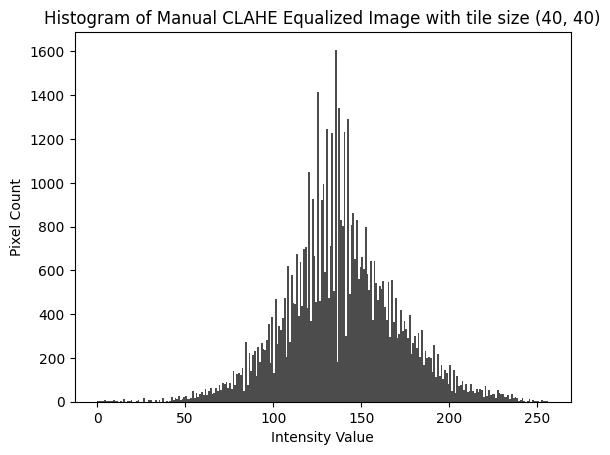

Entropy of manual CLAHE equalized image with tile size (40, 40): 4.8125303213925905
The contrast of the image has been enhanced with tile size (40, 40).


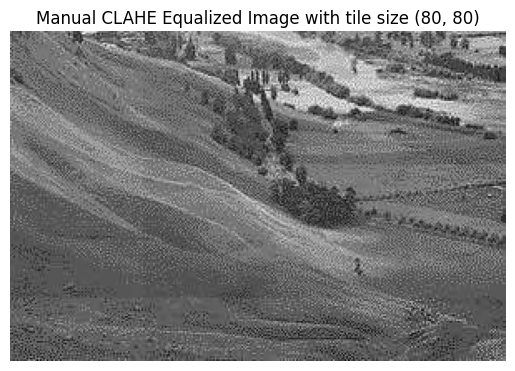

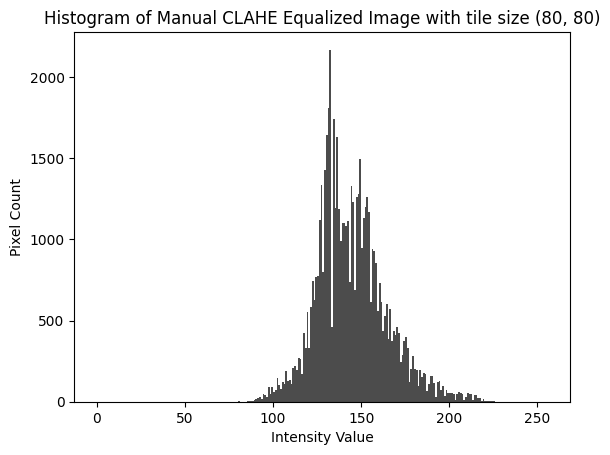

Entropy of manual CLAHE equalized image with tile size (80, 80): 4.331246205212009
The contrast of the image has been enhanced with tile size (80, 80).


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import entropy
import cv2

def image_to_grayscale(image_path):
    image = Image.open(image_path)
    gray_image = image.convert("L")
    return gray_image

def display_image(image, title):
    plt.imshow(image, cmap='gray')

    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_histogram(image, title):
    plt.hist(np.array(image).flatten(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('Intensity Value')
    plt.ylabel('Pixel Count')
    plt.show()

def calculate_entropy(image):
    histogram, _ = np.histogram(np.array(image).flatten(), bins=256, range=[0, 256])
    histogram = histogram / histogram.sum() 
    return entropy(histogram)

def egalisation_par_bloc(image, clip_limit=10.0, tile_grid_size=(40, 40)):
    image_array = np.array(image)
    height, width = image_array.shape
    tile_height, tile_width = tile_grid_size

    equalized_image = np.zeros_like(image_array)

    
    for i in range(0, height, tile_height):
        for j in range(0, width, tile_width):
          
            tile = image_array[i:i+tile_height, j:j+tile_width]

           
            histogram, _ = np.histogram(tile.flatten(), bins=256, range=[0, 256])

           
            excess = histogram - clip_limit
            excess[excess < 0] = 0
            clipped_histogram = histogram - excess
            clipped_histogram += excess.sum() // 256

         
            cdf = clipped_histogram.cumsum()
            cdf_normalized = cdf * 255 / cdf[-1]

            
            equalized_tile = np.interp(tile.flatten(), np.arange(256), cdf_normalized).reshape(tile.shape)

           
            equalized_image[i:i+tile_height, j:j+tile_width] = equalized_tile

    equalized_image = cv2.resize(equalized_image, (width, height), interpolation=cv2.INTER_LINEAR)

    return Image.fromarray(np.uint8(equalized_image))

image_path = r'C:\Users\DELL\Desktop\tp_tim\pics\blurred2.jpg'

gray_image = image_to_grayscale(image_path)


original_entropy = calculate_entropy(gray_image)
display_image(gray_image, "Input Image")
plot_histogram(gray_image, "Histogram of Input Image")
print(f"Entropy of original image: {original_entropy}")

tile_sizes = [(gray_image.size[1] // 2, gray_image.size[0] // 2),(20, 20), (40, 40), (80, 80) ]
for tile_size in tile_sizes:
    equalized_image = egalisation_par_bloc(gray_image, tile_grid_size=tile_size)
    equalized_entropy = calculate_entropy(equalized_image)

    display_image(equalized_image, f"Manual CLAHE Equalized Image with tile size {tile_size}")
    plot_histogram(equalized_image, f"Histogram of Manual CLAHE Equalized Image with tile size {tile_size}")
    print(f"Entropy of manual CLAHE equalized image with tile size {tile_size}: {equalized_entropy}")

    
    if equalized_entropy > original_entropy:
        print(f"The contrast of the image has been enhanced with tile size {tile_size}.")
    else:
        print(f"The contrast of the image has not been significantly enhanced with tile size {tile_size}.")